In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#Read the data

In [2]:
training_data= pd.read_csv(r"D:\Kaggle\insurance.csv")


In [3]:
training_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
training_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Analyzing bmi by graph

C:\Users\ratim\AppData\Local\Temp\ipykernel_9132\1534402352.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data['bmi'])


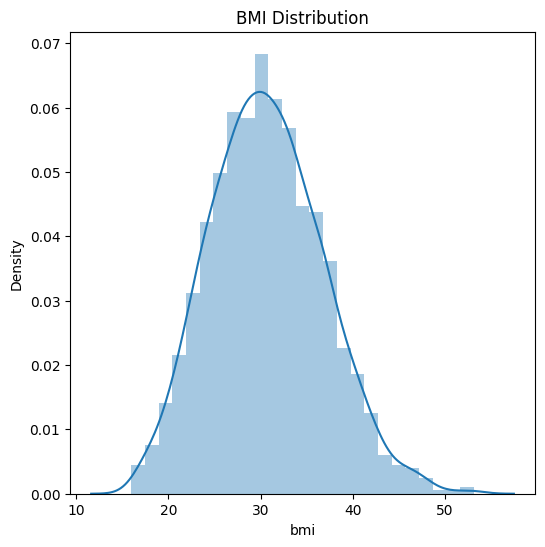

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(training_data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
#Analyzing datatypes

In [5]:
print(training_data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
#check if any coloumn has null value

In [7]:
training_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Modifying the data to train machine effecienctly

In [8]:
training_data.replace({"sex":{"male":0,"female":1},
            "smoker":{"yes":0,"no":1},
            "region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},
           inplace=True)

In [9]:
training_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [ ]:
#Training the machine our target is to predict CHARGES coloumn

In [11]:
x = training_data.drop(columns='charges', axis=1)
y = training_data['charges']

In [ ]:
#Training the machine

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.1,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Getting accuaracy

In [17]:
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7391498174490679
